In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
#from regression_module import *

from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('reg_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerid        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 


In [4]:
## ToDO:
## 2 marks find the number of total missing values for each feature of data frame df
df.isnull().sum()

Unnamed: 0          0
customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [5]:
# Remove unecessary columns from beginning of data ('Unnamed: 0', 'customerid')
df2 = df.iloc[:,2:]
df2.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [6]:
# 2 marks
# Replace churn string values Yes and No with numeric binary values 1 and 0
df2.churn.replace({'Yes':1,"No":0},inplace=True)

In [7]:
df2.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [8]:
# ToDO: 4 marks
# Find the list of names of all the categorical variables
# hint: you need to use select_dtypes function for a pandas dataframe

categorical_columns= ['gender', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [10]:
# ToDO: 1 mark
# obtain categorical_df as a data frame which only contains categorical variables

df2_categorical = df2[categorical_columns]


In [11]:
## ToDO: 4 marks
## One hot encoding transformation 4 marks
## use pd.get_dummies to perform one-hot encoding and set drop_first =True

encoder = OneHotEncoder(sparse=False, drop="first")
df2_categorical_encoded_df = encoder.fit_transform(df2_categorical)

df2_categorical_encoded_df = pd.DataFrame(df2_categorical_encoded_df, columns=encoder.get_feature_names_out())


In [12]:
## ToDO: 2 marks
## Dropping the orginal categorical features from the data frame to remove redundant columns

df2 = df2.drop(columns=categorical_columns)

df2 = pd.concat([df2,df2_categorical_encoded_df], axis=1)

df2.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,29.85,29.85,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [13]:
df2.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'phoneservice_Yes',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_Fiber optic', 'internetservice_No',
       'onlinesecurity_No internet service', 'onlinesecurity_Yes',
       'onlinebackup_No internet service', 'onlinebackup_Yes',
       'deviceprotection_No internet service', 'deviceprotection_Yes',
       'techsupport_No internet service', 'techsupport_Yes',
       'streamingtv_No internet service', 'streamingtv_Yes',
       'streamingmovies_No internet service', 'streamingmovies_Yes',
       'contract_One year', 'contract_Two year', 'paperlessbilling_Yes',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check'],
      dtype='object')

In [14]:
# 2 marks
# Establish our target feature, churn, as our y feature
y = df2['churn']


# Drop our target feature from our features dataframe
X = df2.drop('churn',axis =1)



In [15]:
## ToDO: 2 marks
## Scaling the feature matrix
cols = X.columns
# Instantiate min-max scaling object
mm = MinMaxScaler()
# Fit and transform our feature dataframe
X = pd.DataFrame(mm.fit_transform(X), columns = cols)
X

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.229194,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,0.0,1.000000,0.845274,0.847792,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.039892,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1.0,0.055556,0.558706,0.035303,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [16]:
# Reassign column names so new dataframe has corresponding names
X.columns = cols
X

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.229194,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,0.0,1.000000,0.845274,0.847792,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.039892,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1.0,0.055556,0.558706,0.035303,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [17]:
# Perform train test split from our target feature series and the predicting feature dataframe (set test size to 25% of data)
# ToDO: 2 marks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=46)



In [18]:
# ToDo: 2 marks
# Instantiate a Logistic Regression model without an intercept. C is set to an arbitrarily large number. Use 'liblinear' solver method.
lr = LogisticRegression(fit_intercept=False, solver='liblinear')

# Fit the model to our training data
lr.fit(X_train, y_train)




LogisticRegression(fit_intercept=False, solver='liblinear')

In [19]:
# Generate model prediction data for train and test sets
# 2 marks
y_hat_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)



In [20]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    4250
1    1032
Name: churn, dtype: int64
----------------------------------
0    0.804619
1    0.195381
Name: churn, dtype: float64


In [21]:
# 2 marks
# import classification_report from sklearn.metrics

from sklearn.metrics import classification_report


In [22]:
# 2 marks
# print out classification_report result to show the evaluate
# the model quality of logreg

y_pred_test = lr.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_test)
print(report)



              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1297
           1       0.68      0.54      0.60       464

    accuracy                           0.81      1761
   macro avg       0.76      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



In [23]:
def plot_auc(model, X_train, X_test, y_train, y_test):

    # Calculate probability score of each point in training set
    y_train_score = model.decision_function(X_train)
    # Calculate false positive rate, true positive rate, and thresholds for training set
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    # Calculate probability score of each point in test set
    y_test_score = model.decision_function(X_test)
    # Calculate false positive rate, true positive rate, and thresholds for test set
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

    # Print Area-Under-Curve scores
    print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

    plt.figure(figsize = (20, 8))
    lw = 2

    # Use Train False/True Positive ratios to plot receiver operating characteristic curve for training set
    plt.subplot(121)
    plt.plot(train_fpr, train_tpr, color = 'red', lw = lw, label = 'ROC Curve')
    # Plot positive line w/ slope = 1 for ROC-curve reference
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
    plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
    plt.title('Receiver operating characteristic (ROC) Curve for Training Set', fontweight = 'bold', fontsize = 20)
    plt.legend(loc='lower right')

    # Use Test False/True positive ratios to plot receiver operating characteristic curve for test set
    plt.subplot(122)
    plt.plot(test_fpr, test_tpr, color='red',
         lw=lw, label='ROC curve')
    # Plot positive line w/ slope = 1 for ROC-curve reference
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate', fontweight = 'bold', fontsize = 20)
    plt.ylabel('True Positive Rate', fontweight = 'bold', fontsize = 20)
    plt.title('Receiver operating characteristic (ROC) Curve for Test Set', fontweight = 'bold', fontsize = 20)
    plt.legend(loc='lower right')

    #plt.savefig('pics/Regression_pics/roc_curve.png')

    plt.tight_layout()

Training AUC: 0.8460752663990668
Test AUC: 0.8511443849201074


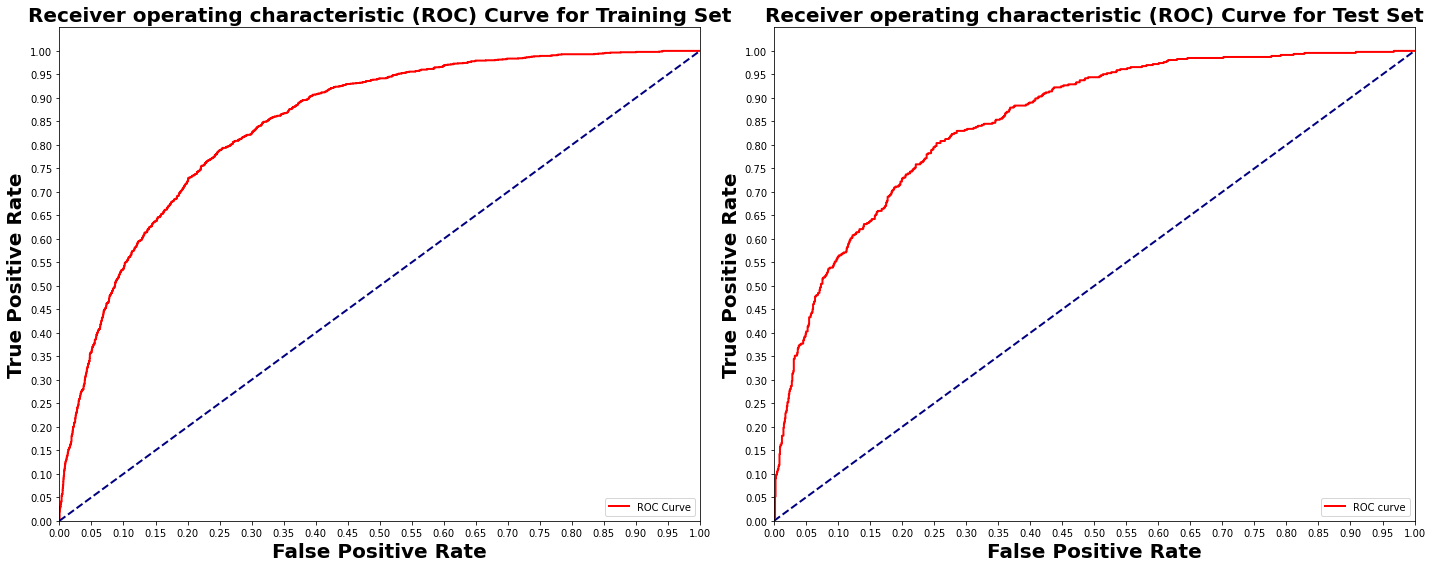

In [24]:
# ToDO: 1 mark
# use plot_auc() function to obtain botht the roc curve for the training dataset and the testing
# dataset


plot_auc(lr,X_train, X_test, y_train, y_test)

